In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
import GPyOpt
import sys
from matplotlib.collections import EllipseCollection

sys.path.append("../code")

from feasible_region import space, constraints

%matplotlib inline

In [10]:
observations = pd.read_csv('observations/observations.csv')

In [11]:
observations.tail(10)

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,objective
1507,3.6,1.800000,1.763174,2.115356,6.316354,10.0,5.0,1.000000
1508,3.6,1.800000,3.163943,2.062593,5.871274,10.0,5.0,1.000000
1509,3.6,1.800000,4.312412,1.743024,6.489525,10.0,5.0,1.000000
1510,3.6,1.800000,1.633685,1.600000,5.744628,10.0,5.0,1.000000
1511,3.6,1.800000,3.880907,2.150047,4.268312,10.0,5.0,1.000000
1512,3.6,1.804027,2.793261,2.063883,5.255963,10.0,5.0,1.000000
1513,3.6,1.800000,4.500000,2.103770,6.389612,10.0,5.0,1.000000
1514,3.6,1.839467,1.235724,2.442135,5.972601,10.0,5.0,1.000000
1515,3.6,1.808605,3.048815,2.085691,5.001062,10.0,5.0,1.000000
1516,3.6,1.800000,4.329547,1.600000,5.548005,10.0,5.0,0.997253


In [43]:
min_dist = 3.6

space = [{'name': 'pitch', 'type': 'continuous', 'domain': (min_dist, min_dist)},\
         {'name': 'yoffset_layer', 'type': 'continuous', 'domain': (min_dist/2, min_dist)},\
         {'name': 'yoffset_plane', 'type': 'continuous', 'domain': (min_dist*0.25, min_dist*1.25)},\
         {'name': 'zshift_layer', 'type': 'continuous', 'domain': (1.6, 2.6)},\
         {'name': 'zshift_plane', 'type': 'continuous', 'domain': (3.8, 6.8)},\
         {'name': 'zshift_view', 'type': 'continuous', 'domain': (10, 10)},\
         {'name': 'alpha', 'type': 'discrete', 'domain': (5, 5)}]

constraints = [{'name': 'constr_1', 'constrain': '-(x[:,0]-x[:,1])**2-x[:,3]**2+2**2'},\
               {'name': 'constr_2', 'constrain': '-(x[:,1]-x[:,2])**2-(x[:,3]-x[:,4])**2+2**2'},\
               {'name': 'constr_3', 'constrain': 'x[:,3]+x[:,4]+2-x[:,5]'}]

In [45]:
step_X = observations[observations.columns[:-1]].values
#because we want to maximize
step_Y = -observations[observations.columns[-1:]].values
ignored_X = step_X[np.isnan(step_Y.ravel())]
step_X = step_X[~np.isnan(step_Y.ravel())]
step_Y = step_Y[~np.isnan(step_Y.ravel())]
bo = GPyOpt.methods.BayesianOptimization(f=None, domain=space, constraints=constraints, X=step_X,\
                                         Y=step_Y, initial_design_numdata=100,\
                                         evaluator_type='local_penalization', batch_size=60)

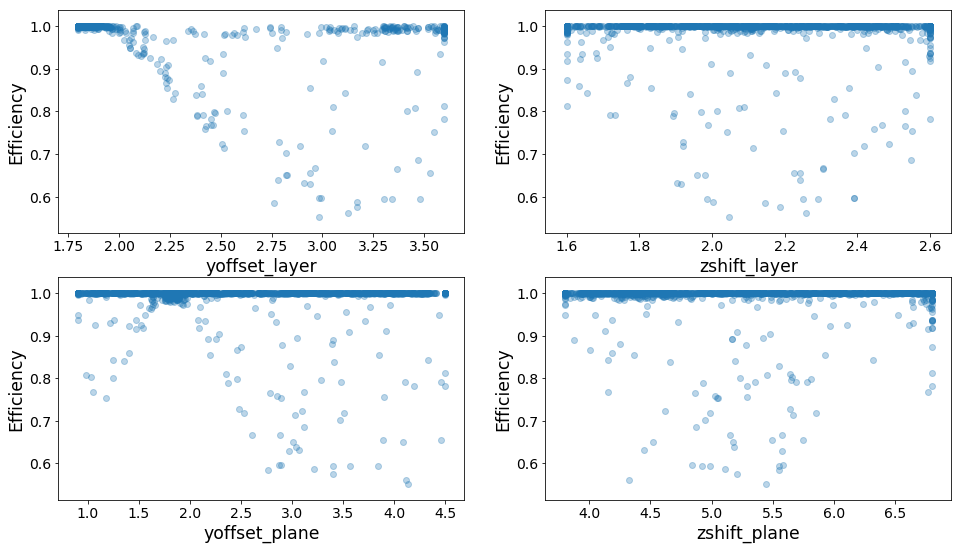

In [66]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 1)
# plt.title('Efficiency vs yoffset_layer')
plt.xlabel('yoffset_layer', fontsize='xx-large')
plt.ylabel('Efficiency', fontsize='xx-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(observations.yoffset_layer[:], observations.objective[:], alpha=0.3)
plt.subplot(2, 2, 2)
# plt.title('Efficiency vs yoffset_layer')
plt.xlabel('zshift_layer', fontsize='xx-large')
plt.ylabel('Efficiency', fontsize='xx-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(observations.zshift_layer[:], observations.objective[:], alpha=0.3)
plt.subplot(2, 2, 3)
# plt.title('Efficiency vs yoffset_layer')
plt.xlabel('yoffset_plane', fontsize='xx-large')
plt.ylabel('Efficiency', fontsize='xx-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(observations.yoffset_plane[:], observations.objective[:], alpha=0.3)
plt.subplot(2, 2, 4)
# plt.title('Efficiency vs yoffset_layer')
plt.xlabel('zshift_plane', fontsize='xx-large')
plt.ylabel('Efficiency', fontsize='xx-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(observations.zshift_plane[:], observations.objective[:], alpha=0.3)

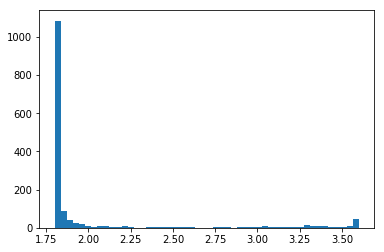

In [5]:
plt.hist(observations.yoffset_layer, bins=50)
plt.show()

In [9]:
observations.values[0, :-1]

array([ 3.6       ,  2.2312114 ,  2.28635182,  2.45648984,  5.47521275,
       10.        ,  5.        ])

In [61]:
def plot_view(x, length=5):
    
    plt.figure(figsize=(9, 16))
    pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = x
    radius = 43.
    for plane in [0, 1]:
        for layer in [0, 1]:
            
            zs = np.array([zshift_layer * layer + zshift_plane * plane] * length)
            ys = np.cumsum([pitch] * length) - pitch + yoffset_layer * layer + yoffset_plane * plane
            plt.scatter(zs, ys, s=np.pi * radius**2, facecolor='none', edgecolors='blue')
#     plt.scatter([0], [0.5], color='red')
#     plt.scatter([0], [0], color='green')
    plt.scatter([-0.5], [-0.5], color='white')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")
    plt.show()

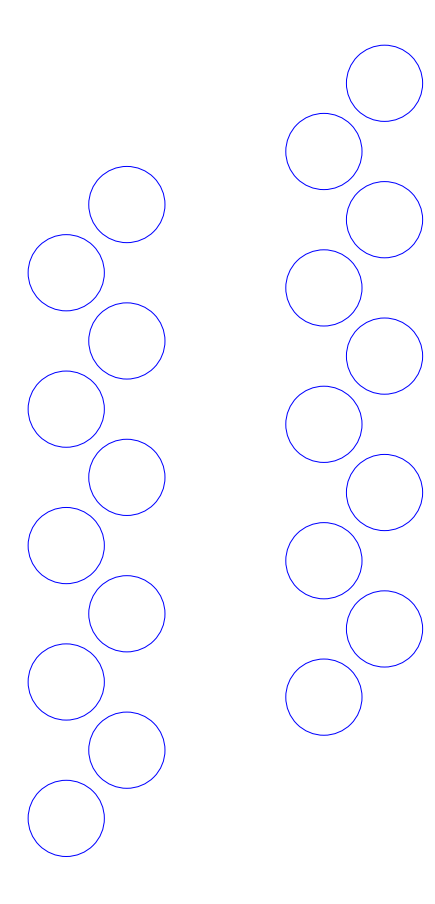

In [62]:
plot_view([  3.6       ,   1.8       ,   3.2,   1.6       ,
         6.8       ,  10.        ,   5.        ])

# Repeat Daniel pics

Fit GP model:

In [5]:
design = observations.dropna()[observations.columns[:-1]].values
#because we want to maximize
answers = -observations.dropna()[observations.columns[-1:]].values

kernel = GPy.kern.RBF(input_dim=7)
# m = GPy.models.GPRegression(design, answers, kernel)
likelihood = GPy.likelihoods.binomial
m = GPy.core.GP()

In [6]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    03s41  0004   3.480923e+06   9.719950e+12 
    15s67  0016  -5.611516e+03   8.963878e+06 
    29s11  0032  -6.042308e+03   6.896433e-06 
    29s89  0033  -6.042308e+03   6.896433e-06 
Runtime:     29s89
Optimization status: Converged



In [14]:
m.optimize_restarts(num_restarts = 2)

Optimization restart 1/2, f = -6042.308401693892
Optimization restart 2/2, f = -6042.308401667786


In [7]:
values = m.predict(design)

In [9]:
values

(array([[-0.90299968],
        [-0.97229251],
        [-0.8736046 ],
        ...,
        [-0.99925   ],
        [-0.99978812],
        [-0.99936392]]), array([[5.05317183e-06],
        [5.00229847e-06],
        [4.81903517e-06],
        ...,
        [3.06625285e-06],
        [2.82254462e-06],
        [3.27816475e-06]]))

In [8]:
m.predict(np.array([[3.6, 1.9 , 1.3, 1.6, 4.2, 10., 5.]]))

(array([[-0.99372807]]), array([[2.70454316e-05]]))

In [54]:
daniel = pd.DataFrame(columns=['yoffset layer', 'yoffset plane', 'zshift layer', 'zshift plane',\
                               'toy simulation objective', 'estimated objective', 'estimated std'])
daniel.loc[len(daniel)] = [19 , 13, 16, 42, 0.999746, -m.predict(np.array([[3.6, 1.9 , 1.3, 1.6, 4.2, 10., 5.]]))[0][0][0],\
                           m.predict(np.array([[3.6, 1.9 , 1.3, 1.6, 4.2, 10., 5.]]))[1][0][0]**0.5]
daniel.loc[len(daniel)] = [19 , 13, 18, 42, 0.999494, -m.predict(np.array([[3.6, 1.9 , 1.3, 1.8, 4.2, 10., 5.]]))[0][0][0],\
                           m.predict(np.array([[3.6, 1.9 , 1.3, 1.8, 4.2, 10., 5.]]))[1][0][0]**0.5]
daniel.loc[len(daniel)] = [18 , 12, 18, 44, 0.99514, -m.predict(np.array([[3.6, 1.8 , 1.2, 1.8, 4.4, 10., 5.]]))[0][0][0],\
                           m.predict(np.array([[3.6, 1.8 , 1.2, 1.8, 4.4, 10., 5.]]))[1][0][0]**0.5]
daniel.loc[len(daniel)] = [18 , 9, 18, 42, 0.99286, -m.predict(np.array([[3.6, 1.8 , 0.9, 1.8, 4.2, 10., 5.]]))[0][0][0],\
                           m.predict(np.array([[3.6, 1.8 , 0.9, 1.8, 4.2, 10., 5.]]))[1][0][0]**0.5]

In [68]:
daniel.loc[len(daniel)] = [18.1362 , 9.6872, 19.8391, 59.3714, np.nan, -m.predict(np.array([[3.6, 1.81362 , 0.96872, 1.98391, 5.93714, 10., 5.]]))[0][0][0],\
                           m.predict(np.array([[3.6, 1.81362 , 0.96872, 1.98391, 5.93714, 10., 5.]]))[1][0][0]**0.5]

In [69]:
daniel

,yoffset layer,yoffset plane,zshift layer,zshift plane,toy simulation objective,estimated objective,estimated std
0,19.0000,13.0000,16.0000,42.0000,0.999746,0.993728,0.005201
1,19.0000,13.0000,18.0000,42.0000,0.999494,0.995609,0.002813
2,18.0000,12.0000,18.0000,44.0000,0.995140,1.000141,0.001741
3,18.0000,9.0000,18.0000,42.0000,0.992860,1.000074,0.001979
4,18.1362,9.6872,19.8391,59.3714,NaN,1.001394,0.001866


In [70]:
daniel['tru simulation objective'] = [0.999457, 0.999340, 1.0, 0.999838, 0.999852]

In [72]:
daniel.columns

Index(['yoffset layer', 'yoffset plane', 'zshift layer', 'zshift plane',
       'toy simulation objective', 'estimated objective', 'estimated std',
       'tru simulation objective'],
      dtype='object')

In [75]:
daniel['low fidelity objective'] = daniel['toy simulation objective']
daniel['high fidelity objective'] = daniel['tru simulation objective']

In [76]:
daniel[['yoffset layer', 'yoffset plane', 'zshift layer', 'zshift plane',
       'low fidelity objective', 'high fidelity objective', 'estimated objective', 'estimated std']]

,yoffset layer,yoffset plane,zshift layer,zshift plane,low fidelity objective,high fidelity objective,estimated objective,estimated std
0,19.0000,13.0000,16.0000,42.0000,0.999746,0.999457,0.993728,0.005201
1,19.0000,13.0000,18.0000,42.0000,0.999494,0.999340,0.995609,0.002813
2,18.0000,12.0000,18.0000,44.0000,0.995140,1.000000,1.000141,0.001741
3,18.0000,9.0000,18.0000,42.0000,0.992860,0.999838,1.000074,0.001979
4,18.1362,9.6872,19.8391,59.3714,NaN,0.999852,1.001394,0.001866


In [16]:
arm = np.array(values)[0].argmin()
arm

318

In [28]:
m.predict_noiseless(design[arm].reshape(1, -1))

(array([[-1.0013945]]), array([[9.40436362e-07]]))

In [18]:
print(values[0][arm], values[1][arm])

[-1.0013945] [3.48141023e-06]


In [20]:
np.sqrt(values[1][arm])

array([0.00186585])

In [19]:
design[arm]

array([ 3.6       ,  1.81362205,  0.9687249 ,  1.98391634,  5.93714717,
       10.        ,  5.        ])

In [ ]:
plt.plot(m.predict(nois))

In [134]:
len(design)

335

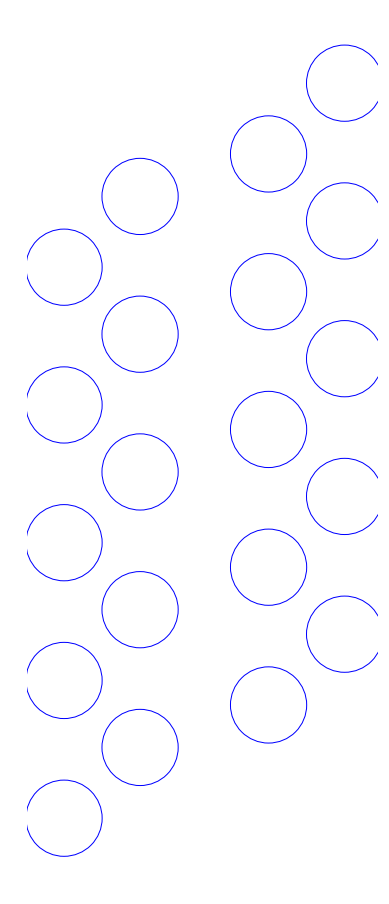

In [153]:
plot_view(design[arm])

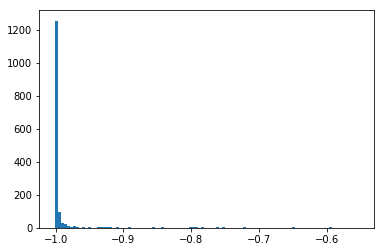

In [26]:
plt.hist(np.array(m.predict(design))[0], bins=100)
plt.show()

In [29]:
errors = []
estimated_objectives = []
best_points = []

for step in np.arange(200, 1500, 20):
    design = observations.dropna()[observations.columns[:-1]].values[:step]
    #because we want to maximize
    answers = -observations.dropna()[observations.columns[-1:]].values[:step]

    kernel = GPy.kern.RBF(input_dim=7)
    m = GPy.models.GPRegression(design, answers, kernel)
    m.optimize(messages=False)
    m.optimize_restarts(num_restarts = 2)

    values = m.predict_noiseless(design)
    arm = np.array(values)[0].argmin()
    
    errors.append(values[1][arm])
    best_points.append(arm)
    estimated_objectives.append(values[0][arm])
    print(step)

Optimization restart 1/2, f = -337.1535306551298
Optimization restart 2/2, f = -337.1535306550957
200
Optimization restart 1/2, f = -391.6566896432014
Optimization restart 2/2, f = -391.6566896408664
220
Optimization restart 1/2, f = -435.0673718399356
Optimization restart 2/2, f = -435.06737183974184
240
Optimization restart 1/2, f = -482.3343524493371
Optimization restart 2/2, f = -482.33435244812097
260
Optimization restart 1/2, f = -529.2980231873771
Optimization restart 2/2, f = -529.2980231869203
280
Optimization restart 1/2, f = -577.7357877946405
Optimization restart 2/2, f = -577.7357877944958
300
Optimization restart 1/2, f = -637.0922802510937
Optimization restart 2/2, f = -637.092280250941
320
Optimization restart 1/2, f = -695.0204237460198
Optimization restart 2/2, f = -695.0204237464246
340
Optimization restart 1/2, f = -755.7455189651193
Optimization restart 2/2, f = -755.7455189647816
360
Optimization restart 1/2, f = -826.022182943831
Optimization restart 2/2, f = -82

KeyboardInterrupt: 

In [136]:
np.arange(200, 1500, 20)

array([ 200,  220,  240,  260,  280,  300,  320,  340,  360,  380,  400,
        420,  440,  460,  480,  500,  520,  540,  560,  580,  600,  620,
        640,  660,  680,  700,  720,  740,  760,  780,  800,  820,  840,
        860,  880,  900,  920,  940,  960,  980, 1000, 1020, 1040, 1060,
       1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280,
       1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480])

Text(0.5,0,'iteration')

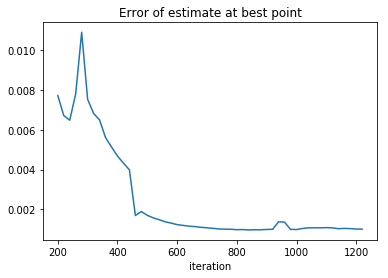

In [36]:
plt.plot(np.arange(200, 1240, 20), np.sqrt(errors).ravel())
plt.title('Error of estimate at best point')
plt.xlabel('iteration')

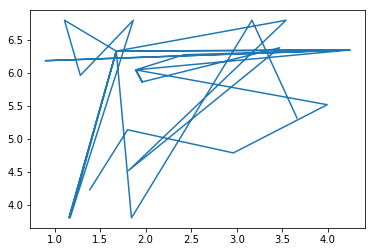

In [149]:
plt.plot(observations['yoffset_plane'][best_points], observations['zshift_plane'][best_points])

Text(0.5,0,'iteration')

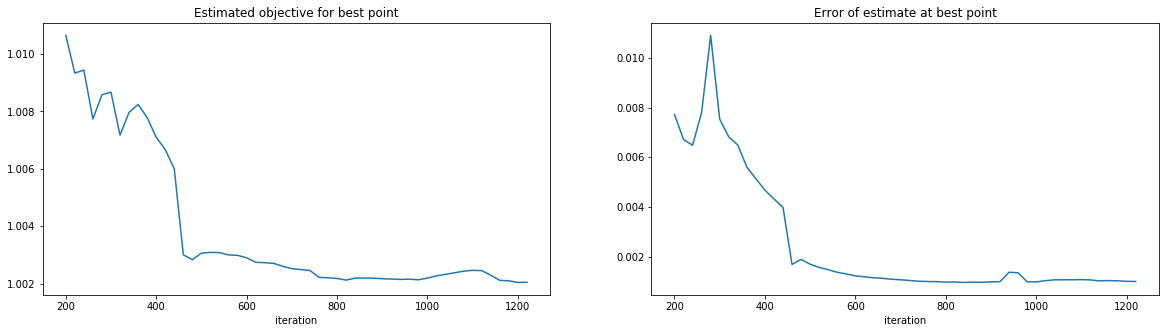

In [37]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(200, 1240, 20), -np.array(estimated_objectives))
plt.title('Estimated objective for best point')
plt.xlabel('iteration')
plt.subplot(1, 2, 2)
plt.plot(np.arange(200, 1240, 20), np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')